In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Chargement des données
df = pd.read_csv(r"C:\Users\Pc\Desktop\2A\2A\DS\projet2\RT_IOT2022")

Analyse exploratoire des données (EDA)

In [4]:
# Aperçu général
df.shape

(123117, 85)

In [5]:
df.head() # Voir les 5 premières lignes

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [6]:
df.info()  # Informations sur les colonnes et types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [7]:
df.describe() # Statistiques pour les variables numériques


,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [8]:
df['Attack_type'].value_counts()  # Nombre d'occurrences de chaque type d'attaque

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [9]:
df['Attack_type'].value_counts(normalize=True)  # Proportion de chaque type

Attack_type
DOS_SYN_Hping                 0.768854
Thing_Speak                   0.065856
ARP_poisioning                0.062948
MQTT_Publish                  0.033675
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008139
DDOS_Slowloris                0.004337
Wipro_bulb                    0.002055
Metasploit_Brute_Force_SSH    0.000301
NMAP_FIN_SCAN                 0.000227
Name: proportion, dtype: float64

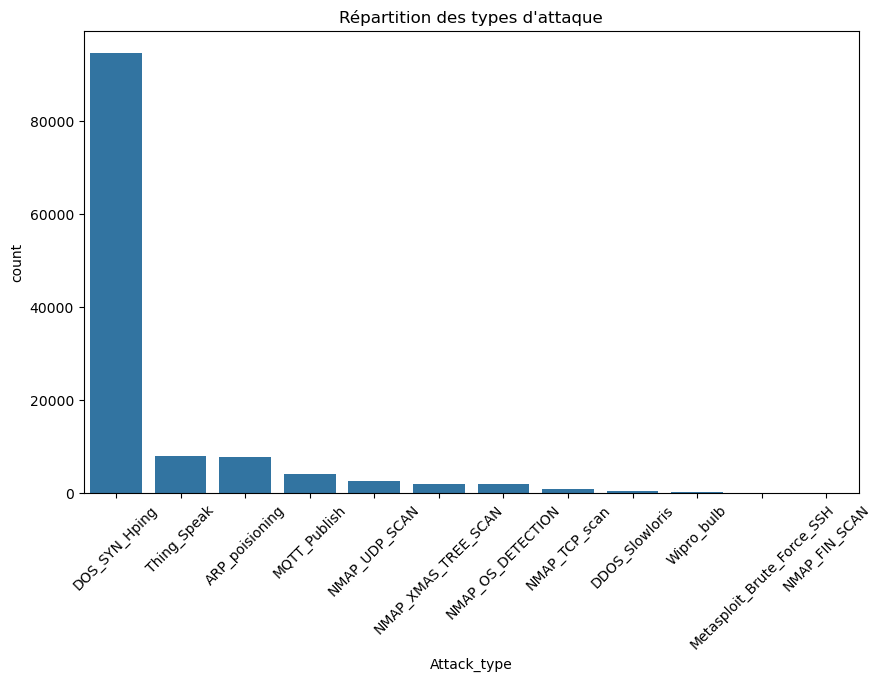

In [10]:
# Visualisation de la répartition
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Attack_type', order=df['Attack_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Répartition des types d'attaque")
plt.show()

In [11]:
# 1️⃣ Séparation des variables

In [12]:
# Variables numériques
target = 'Attack_type'

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Unnamed: 0')  # On peut retirer la colonne inutile
if target in numeric_features:
    numeric_features.remove(target)  # Retirer la target si elle est détectée

# Variables catégoriques
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove(target)  # Retirer la target

print("Variables numériques :", numeric_features[:10], "…")  
print("Variables catégoriques :", categorical_features)


Variables numériques : ['id.orig_p', 'id.resp_p', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec'] …
Variables catégoriques : ['proto', 'service']


In [13]:
#Statistiques descriptives
print("\n--- Statistiques des variables numériques ---")
print(df[numeric_features].describe())

print("\n--- Statistiques des variables catégoriques ---")
for col in categorical_features:
    print(f"\nColonne {col} :")
    print(df[col].value_counts())


--- Statistiques des variables numériques ---
           id.orig_p      id.resp_p  flow_duration   fwd_pkts_tot  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    34639.258738    1014.305092       3.809566       2.268826   
std     19070.620354    5256.371994     130.005408      22.336565   
min         0.000000       0.000000       0.000000       0.000000   
25%     17702.000000      21.000000       0.000001       1.000000   
50%     37221.000000      21.000000       0.000004       1.000000   
75%     50971.000000      21.000000       0.000005       1.000000   
max     65535.000000   65389.000000   21728.335578    4345.000000   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  123117.000000      123117.000000      123117.000000      1.231170e+05   
mean        1.909509           1.471218           0.820260      3.518063e+05   
std        33.018311          19.635196          32.293948      3.707645e+05   
min        

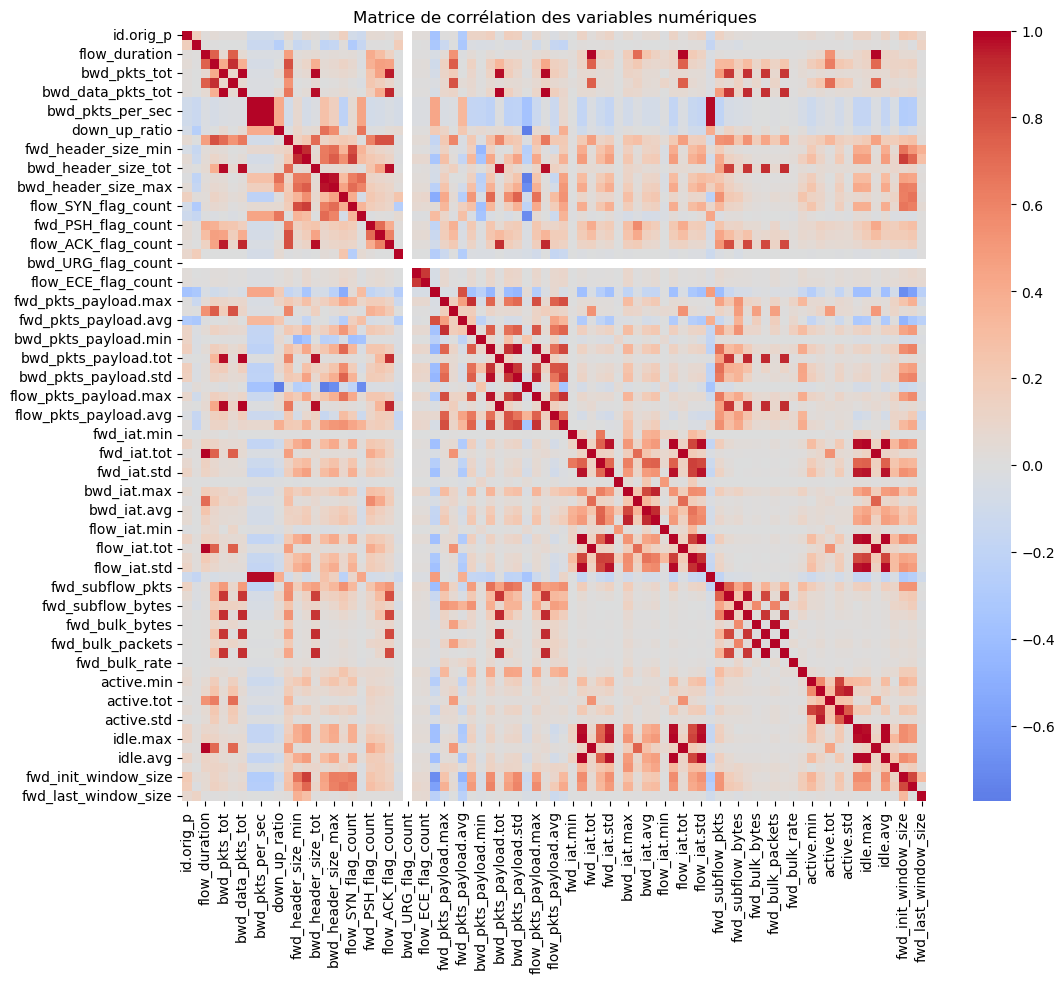

In [14]:
# Corrélations entre variables numériques
corr_matrix = df[numeric_features].corr()  # Matrice de corrélation
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

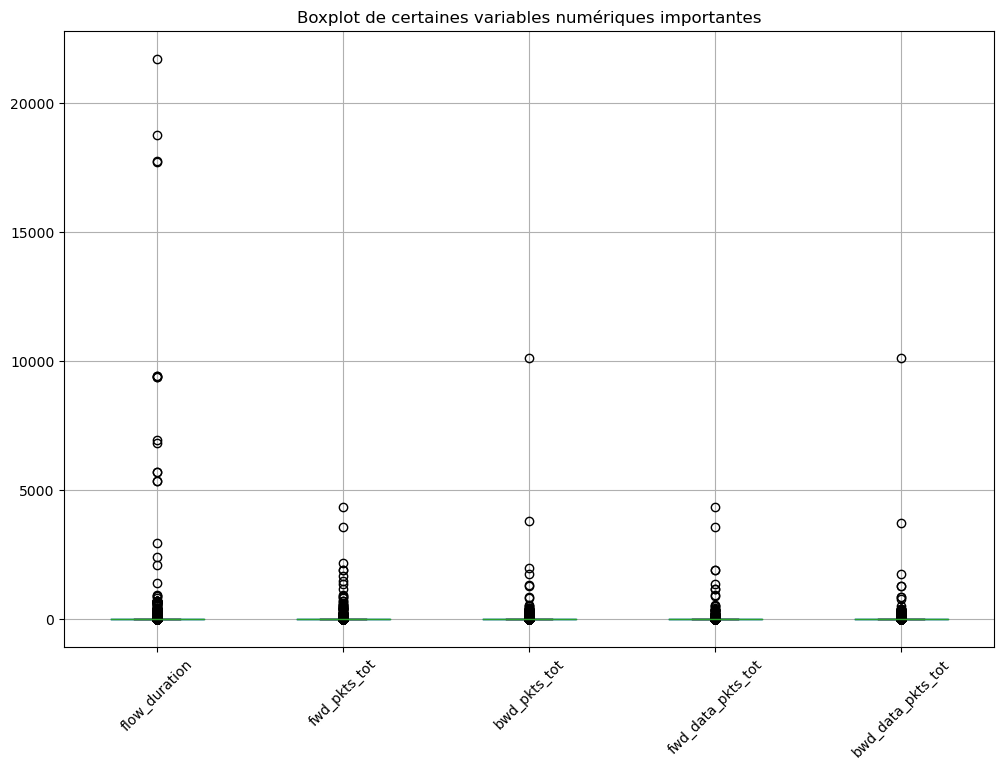

In [15]:
#  Détection des outliers (valeurs aberrantes)
important_features = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot']

plt.figure(figsize=(12,8))
df[important_features].boxplot()
plt.title("Boxplot de certaines variables numériques importantes")
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1000 with 0 Axes>

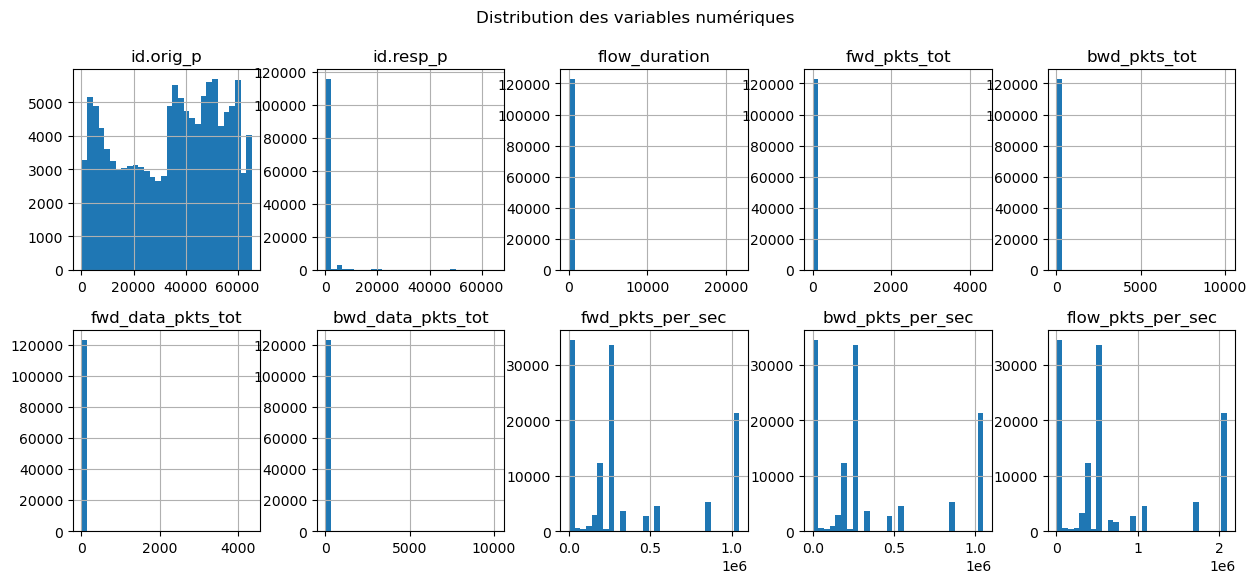

In [16]:
# Visualisation de la distribution des variables numériques
plt.figure(figsize=(15,10))
df[numeric_features[:10]].hist(bins=30, layout=(2,5), figsize=(15,6))  # Affiche les 10 premières
plt.suptitle("Distribution des variables numériques")
plt.show()

Pré-processing des données

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [18]:
df = pd.read_csv(r"C:\Users\Pc\Desktop\2A\2A\DS\projet2\RT_IOT2022")

In [19]:
# On supprime 'Unnamed: 0' et les colonnes ID qui ne sont pas utiles pour le ML
df = df.drop(columns=['Unnamed: 0', 'id.orig_p', 'id.resp_p'])

In [20]:
# Encodage des variables catégoriques

categorical_features = ['proto', 'service'] 
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])  

In [21]:
# Encodage de la target
df['Attack_type'] = LabelEncoder().fit_transform(df['Attack_type'])

In [22]:
# Normalisation des variables numériques
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# On retire la target si elle existe dans la liste
if 'Attack_type' in numeric_features:
    numeric_features.remove('Attack_type')

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [23]:
# Séparation des features et de la target

X = df.drop(columns=['Attack_type'])
y = df['Attack_type']

In [24]:
# Split train/test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Taille du train set :", X_train.shape)
print("Taille du test set :", X_test.shape)

Taille du train set : (98493, 81)
Taille du test set : (24624, 81)


In [25]:
df.head()

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,1,5,0.216931,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.015925,3.191211,3.029218,0.213188,3.115811,-0.041693,3.105383,2.406197,-0.039563,3
1,1,5,0.215946,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.015925,3.205525,3.042846,0.214214,3.129811,-0.041693,3.105383,2.406197,-0.039563,3
2,1,5,0.217796,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.015925,3.204035,3.041427,0.214107,3.128353,-0.041693,3.105383,2.406197,-0.039563,3
3,1,5,0.216542,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.015925,3.212165,3.049169,0.214689,3.136306,-0.041693,3.105383,2.406197,-0.039563,3
4,1,5,0.216090,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.015925,3.200919,3.038461,0.213884,3.125306,-0.041693,3.105383,2.406197,-0.039563,3


In [26]:
df.describe()

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
count,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000
mean,1.102147,0.614952,-3.823473e-18,-3.113606e-17,4.184178e-18,5.713568e-18,2.236371e-18,7.139074e-17,-1.625193e-16,1.018631e-16,...,-2.088482e-18,-1.587102e-17,6.660058e-17,2.441973e-17,3.832130e-17,-5.049870e-18,1.277761e-16,-1.044602e-16,-5.632770e-17,2.796243
std,0.304367,1.685150,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,2.461914
min,0.000000,0.000000,-2.930325e-02,-1.015749e-01,-5.783205e-02,-7.492792e-02,-2.539992e-02,-9.488712e-01,-9.486569e-01,-9.487673e-01,...,-1.592498e-02,-1.835156e-01,-1.839495e-01,-2.861030e-02,-1.848540e-01,-4.169290e-02,-3.269303e-01,-2.734633e-01,-1.191171e-01,0.000000
25%,1.000000,0.000000,-2.930324e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,-9.486702e-01,-9.484603e-01,-9.485663e-01,...,-1.592498e-02,-1.835156e-01,-1.839495e-01,-2.861030e-02,-1.848540e-01,-4.169290e-02,-3.235108e-01,-2.734633e-01,-1.089747e-01,2.000000
50%,1.000000,0.000000,-2.930322e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,-2.834225e-01,-2.832745e-01,-2.833495e-01,...,-1.592498e-02,-1.835156e-01,-1.839495e-01,-2.861030e-02,-1.848540e-01,-4.169290e-02,-3.235108e-01,-2.734633e-01,-1.089747e-01,2.000000
75%,1.000000,0.000000,-2.930321e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,4.652074e-01,4.652806e-01,4.652456e-01,...,-1.592498e-02,-1.835156e-01,-1.839495e-01,-2.861030e-02,-1.848540e-01,-4.169290e-02,-3.235108e-01,-2.734633e-01,-1.089747e-01,2.000000
max,2.000000,9.000000,1.671055e+02,1.944233e+02,3.061977e+02,2.212123e+02,3.128828e+02,1.879286e+00,1.879218e+00,1.879259e+00,...,3.230620e+02,3.387117e+01,3.224042e+01,1.705100e+02,3.312247e+01,1.106488e+02,3.174575e+00,6.267734e+00,1.026652e+01,11.000000


Construction des modèles ML

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np


In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=20),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=20, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "Linear SVM (SGD)": LogisticRegression(max_iter=500)
}


In [29]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": acc
    })
    
    # Affichage des résultats détaillés
    print("="*60)
    print(f"Modèle : {name}")
    print("Accuracy :", acc)
    print("\nClassification Report :")
    print(classification_report(y_test, y_pred))


Modèle : Logistic Regression
Accuracy : 0.9896442495126706

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1550
           1       0.94      0.79      0.86       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.86      0.86      0.86         7
           5       0.83      0.83      0.83         6
           6       0.99      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.95      0.98      0.97       518
           9       1.00      1.00      1.00       402
          10       0.92      0.96      0.94      1622
          11       0.85      0.57      0.68        51

    accuracy                           0.99     24624
   macro avg       0.94      0.91      0.92     24624
weighted avg       0.99      0.99      0.99     24624

Modèle : KNN
Accuracy : 0.9953703703703703

Class

C:\Users\Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

Modèle : Extra Trees
Accuracy : 0.9975227420402859

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1550
           1       0.96      0.92      0.94       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.78      1.00      0.88         7
           5       0.83      0.83      0.83         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.98      0.98      0.98       518
           9       1.00      1.00      1.00       402
          10       0.99      0.98      0.99      1622
          11       0.98      0.98      0.98        51

    accuracy                           1.00     24624
   macro avg       0.96      0.97      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Modèle : Linear SVM (SGD)
Accuracy : 0.9896442495126706



In [30]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy
4,Random Forest,0.997563
7,Extra Trees,0.997523
5,Gradient Boosting,0.996954
3,Decision Tree,0.996467
1,KNN,0.995370
0,Logistic Regression,0.989644
8,Linear SVM (SGD),0.989644
6,AdaBoost,0.902575
2,Naive Bayes,0.879914


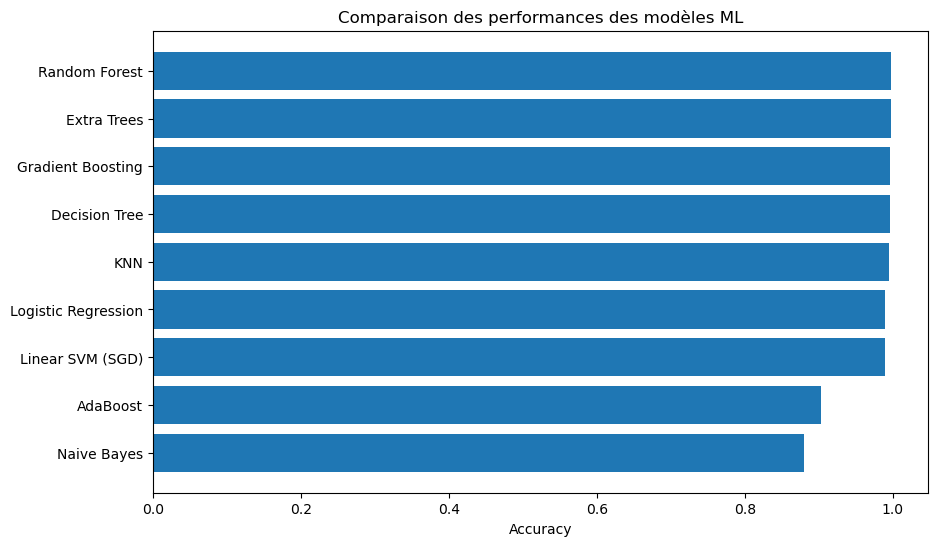

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(results_df["Model"], results_df["Accuracy"])
plt.xlabel("Accuracy")
plt.title("Comparaison des performances des modèles ML")
plt.gca().invert_yaxis()
plt.show()


Tuning des modèles candidats et choix du modèle final

In [32]:
#Tuning du modèle Random Forest

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Modèle de base
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [34]:
#Lancement du GridSearch
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_weighted'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter 

In [35]:
# Meilleur modèle Random Forest
best_rf = grid_rf.best_estimator_

print("Meilleurs paramètres Random Forest :")
print(grid_rf.best_params_)


Meilleurs paramètres Random Forest :
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# Tuning du modèle Extra Trees

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Modèle Extra Trees
et = ExtraTreesClassifier(
    random_state=42,
    n_jobs=-1
)


In [37]:
param_grid_et = {
    'n_estimators': [100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}

grid_et = GridSearchCV(
    estimator=et,
    param_grid=param_grid_et,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_et.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",ExtraTreesCla...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 20], 'min_samples_split': [2, 5], 'n_estimators': [100]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_weighted'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sc

In [38]:
best_et = grid_et.best_estimator_

print("Meilleurs paramètres Extra Trees :")
print(grid_et.best_params_)


Meilleurs paramètres Extra Trees :
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [39]:
# Évaluation finale des deux modèles tunés

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models_final = {
    "Random Forest Tuné": best_rf,
    "Gradient Boosting Tuné": best_et
}

for name, model in models_final.items():
    
    y_pred = model.predict(X_test)
    
    print("="*60)
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("\nClassification Report :")
    print(classification_report(y_test, y_pred))


Random Forest Tuné
Accuracy : 0.9975633528265108

Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1550
           1       0.96      0.92      0.94       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.78      1.00      0.88         7
           5       0.83      0.83      0.83         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.98      0.98      0.98       518
           9       1.00      1.00      1.00       402
          10       0.99      0.98      0.99      1622
          11       0.98      0.98      0.98        51

    accuracy                           1.00     24624
   macro avg       0.96      0.97      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Gradient Boosting Tuné
Accuracy : 0.9979288499025342

Class

In [42]:
# Choix du modèle final avec la mention des résultats finaux du test de ce modèle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions finales sur le jeu de test
y_pred_final = best_et.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_final)
print("Accuracy finale du modèle Extra Trees :", accuracy)

# Rapport de classification
print("\nRapport de classification final :")
print(classification_report(y_test, y_pred_final))

Accuracy finale du modèle Extra Trees : 0.9979288499025342

Rapport de classification final :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1550
           1       0.97      0.93      0.95       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.78      1.00      0.88         7
           5       0.62      0.83      0.71         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       0.98      0.99      0.99       518
           9       1.00      1.00      1.00       402
          10       1.00      0.99      0.99      1622
          11       0.98      0.98      0.98        51

    accuracy                           1.00     24624
   macro avg       0.94      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624



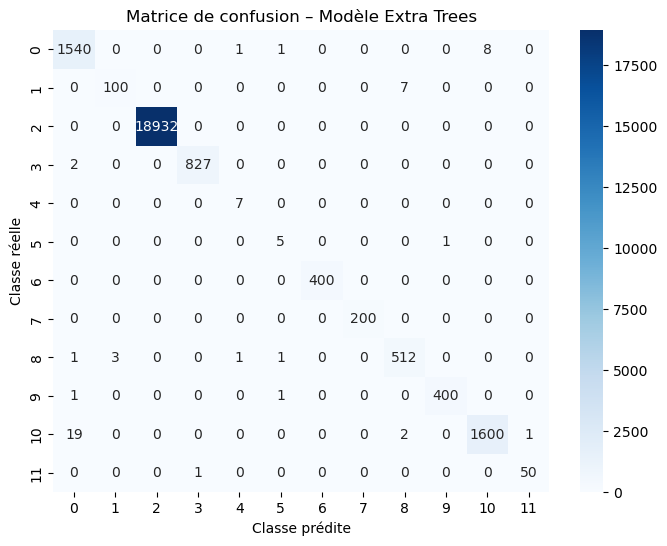

In [43]:
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion – Modèle Extra Trees")
plt.show()


Sauvegarde du modèle

In [45]:
import joblib

# Sauvegarde du modèle final
joblib.dump(best_et, "extra_trees_model.pkl")

# Sauvegarde du scaler 
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']